# Sensitivity and Complementary Sensitivtiy Functions
## today's objectives: 
- recall  main advantages of feedback
- derive and understand main feedback equation

## Assume:
- transfer function representation of a system
- working knowledge of bode plots

# Notation

![openloop](openloop.png "Open-Loop")

- $P$: plant (system)
- $u$: input (variable can be manipulated)
- $y$: output (variable to be controlled)
- $d$: disturbance (affects value of output)

![feedbackloop](feedbackloop.png "Feedback")

- $K$: controller
- $r$: reference signal (desired output)
- $n$: measurement noise (error in measurement)
- $y_m$: measured output


# Why feedback?










![AttaboticsThunderdome](attabotics-thunderdome.png "Attabotics Thunderdome")

- Ability to follow desired signals
- Stability (design)
- Reduction of effects of process noise / load disturbances (noise rejection, compensation)
- Reduction of effects of model uncertainties
- Efficiency (design)

# Let's illustrate these advantages using a simplified model a cruise control system!

![Car](car.png "Car")

source: https://www.istockphoto.com/photos/futuristic-car-isolated


![Hot air balloon free body diagram](hot-air-balloon-free-body-diagram.png "Hot air balloon free body diagram")

where,
- $F_b$ is the force due to buoyancy
- $F_d$ is the force due to drag
- $F_g$ is the force due to gravity

Buoyancy Force (Archimedes' principle):
$$
\begin{align*}
F_b &= V(\rho_{amb} - \rho_{balloon})g \\
&= V(k_{density}h - \rho_{balloon})g,
\end{align*}
$$
where 
- $V$ is the volume of the balloon,
- $\rho_{amb}$ is the density of the ambient air,
- $\rho_{balloon}$ is the density of the (hot) air in the balloon,
- $g$ is the acceleration due to gravity,
- $k_{density}$ is a coefficient relating density of air vs. height.

Force due to gravity:
$$
\begin{align*}
F_g = m g,
\end{align*}
$$
where 
- $m$ is the mass of the balloon,
- $g$ is the acceleration due to gravity.

Force due to drag:
$$
\begin{align*}
F_d = k_{drag} v = k_{drag} \frac{\text{d} h}{\text{dt}},
\end{align*}
$$
where 
- $k_{drag}$ is drag coefficient,
- $h$ height of the balloon. 

The density of the air inside the balloon can be manipulated using a heater. The heater is mounted on the bottom of the balloon, so heat must diffuse from the bottom of the balloon to the rest of the balloon. Diffusion equation:
$$
\begin{align*}
\frac{\text{d} \rho_{balloon}}{\text{dt}} = k_{diff} \rho_{balloon} + u(t)
\end{align*}
$$





# Putting it all together. 

Sum of forces:
$$
\begin{align*}
\sum_i F_i = ma
F_b - F_d - F_g = ma \\
V(k_{density}h - \rho_{balloon})g - k_{drag} \frac{\text{d} h}{\text{dt}} - m g = m \frac{\text{d}^2 h}{\text{dt}^2}
\end{align*}
$$

Choose reference height $h_r = \frac{mg/k_{density}}$, so that $h = h_d + h_r$. Then we have:
$$
\begin{align*}
\sum_i F_i = ma
F_b - F_d - F_g = ma \\
V(k_{density}h_d - \rho_{balloon})g - k_{drag} \frac{\text{d} h_d}{\text{dt}} = m \frac{\text{d}^2 h_d}{\text{dt}^2}
\end{align*}
$$

The second equation we have is:
$$
\begin{align*}
\frac{\text{d} \rho_{balloon}}{\text{dt}} = k_{diff} \rho_{balloon} + u(t)
\end{align*}
$$



# In Class Activity

From these two equations, derive a state space representation. 

The output of the system is the balloon height. 

For the state vector, use:
$$
\begin{align*}
x = \begin{bmatrix} v \\ h_d \\ \rho_{balloon} \end{bmatrix} = \begin{bmatrix} \frac{\text{d}h_d}{\text{dt}} \\ h_d \\ \rho_{balloon} \end{bmatrix}
\end{align*}
$$

# State Space Representation

State equation:
$$
\begin{align*}
\frac{\text{d}x}{\text{dt}} &= \begin{bmatrix} \frac{\text{d}^2h_d}{\text{dt}^2} \\ \frac{\text{d}h_d}{\text{dt}} \\ \frac{\text{d}\rho_{balloon}}{\text{dt}} 
\end{bmatrix} \\
&= \begin{bmatrix} 
\frac{1}{m}k_{drag} & \frac{1}{m}V k_{density} g & \frac{1}{m}V g \\
1 & 0 & 0 \\
0 & 0 & k_{diff} 
\end{bmatrix}
\begin{bmatrix} v \\ h_d \\ \rho_{balloon} \end{bmatrix} +
\begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} u(t)
\end{align*}
$$

Output equation:
$$
\begin{align*}
y(t) &= h_d \\
&= \begin{bmatrix} 0 & 1 & 0 \end{bmatrix} 
\begin{bmatrix} v \\ h_d \\ \rho_{balloon} \end{bmatrix} 
\end{align*}
$$

So we have:
$$
\begin{align*}
A &= \begin{bmatrix} 
\frac{1}{m}k_{drag} & \frac{1}{m}V k_{density} g & \frac{1}{m}V g \\
1 & 0 & 0 \\
0 & 0 & k_{diff} 
\end{bmatrix} \\
B&= \begin{bmatrix} 0 \\ 0 \\ 1 \end{bmatrix} \\
&= \begin{bmatrix} 0 & 1 & 0 \end{bmatrix} \\
D &=0
\end{align*}



In [11]:
#101000.3/287/290

#4/3*math.pi*(10)**3

#0.47/2*1.204*(math.pi)*10**2

print(np.exp(-0.01))
print(np.exp(-10))


0.9900498337491681
4.5399929762484854e-05


In [55]:
import control as ct
import numpy as np
import controls_teaching_lecture_utilities as cu
import math
import scipy as sp
import matplotlib.pyplot as plt

In [78]:
# Very simple model of a hot air balloon (input = heat, output = altitude)
V = 4188 #m^3
k_density = 0.01*0.82*1.204/2000 #kg/m^4
m = 750 #kg
k_drag = 0.1*88 #Ns/m
k_diff = 0.000019 #m^2/s
g = 9.81 #m/s^2

#A = np.array([[-k_drag/m, V*k_density*g/m, -V*g/m], [1, 0, 0], [0, 0, -k_diff]])
#B = np.array([[0], [0], [1]])
#C = np.array([[0, 1, 0]])
#D = 0
tau1 = 1
tau2 = 2
A = np.array([[-1/tau1, 10, 0], [0, -1/tau2, 1], [0, 1, 0]])
B = np.array([[1], [0], [0]])
C = np.array([[0, 0, 1]])
D = 0

Pss = ct.StateSpace(A, B, C, D)
P = ct.ss2tf(Pss)

print( P )

#P_tf = C@
#tout, yout, xout = sp.signal.lsim((A, B, C, D),U=u,T=t)
Lambda, T = np.linalg.eig(A)
print(Lambda)



0
-
1

[-1.         -1.28077641  0.78077641]



-0.001
------
  1


     s^3 + 0.01175 s^2 + 2.229e-07 s
-----------------------------------------
s^3 + 0.01175 s^2 + 2.229e-07 s - 0.05478

[-0.19383006+0.32886864j -0.19383006-0.32886864j  0.37590778+0.j        ]


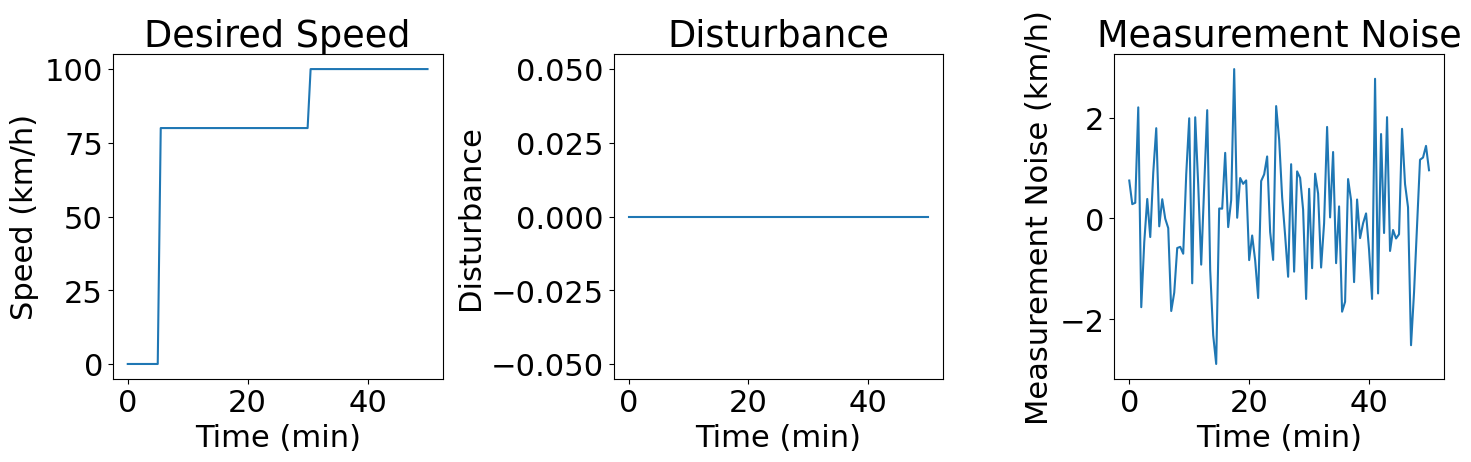

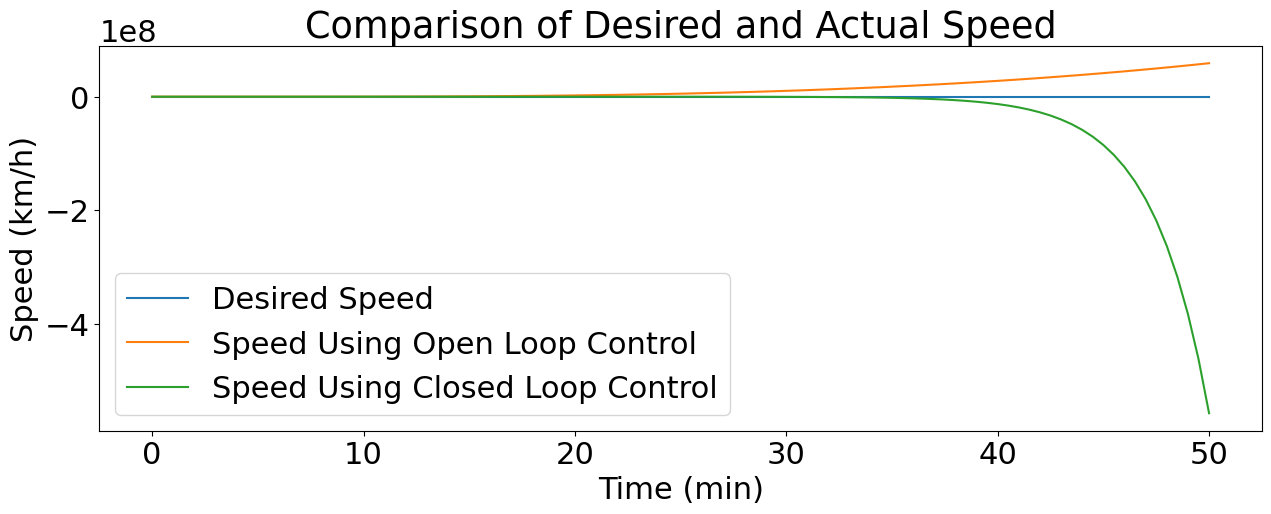

In [68]:
def sim_closed_loop(P,K,t,r,d,n):
    L = K*P
    S = 1/(1+L)
    T = L/(1+L)   

    print(S)
    print(ct.pole(S))

    y_r = ct.forced_response(T,t,r) 
    y_n = ct.forced_response(T,t,n) 
    y_d = ct.forced_response(P*S,t,d) 

    y = y_r.y + y_d.y + y_n.y

    u_r = ct.forced_response(K*S,t,r) 
    u_d = ct.forced_response(T,t,d) 
    u_n = ct.forced_response(K*S,t,d) 

    u = u_r.y - u_d.y - u_n.y



    return np.squeeze(y), np.squeeze(u)


def sim_open_loop(P,t,u,d):    
    y_r = ct.forced_response(P,t,u) 
    y_d = ct.forced_response(P,t,d) 
    y = np.squeeze(y_r.y) + np.squeeze(y_d.y)  
    return y


def make_open_and_closed_loop_plots(t,r,d,n,y2,y1):
    fig,ax = plt.subplots(1,3, figsize=(15,5) )
    ax[0].plot(t,r)
    ax[0].set_xlabel('Time (min)')
    ax[0].set_ylabel('Speed (km/h)')
    ax[0].set_title('Desired Speed')
    ax[1].plot(t,d)
    ax[1].set_xlabel('Time (min)')
    ax[1].set_ylabel('Disturbance')
    ax[1].set_title('Disturbance')   
    ax[2].plot(t,n)    
    ax[2].set_xlabel('Time (min)')
    ax[2].set_ylabel('Measurement Noise (km/h)')
    ax[2].set_title('Measurement Noise')
        
    fig.tight_layout()
    
    fig,ax = plt.subplots(1,1, figsize=(15,5))
    ax.plot(t,r, label='Desired Speed')
    ax.plot(t,y1, label='Speed Using Open Loop Control')   
    ax.plot(t,y2, label='Speed Using Closed Loop Control') 
    ax.set_xlabel('Time (min)')
    ax.set_ylabel('Speed (km/h)')
    ax.set_title('Comparison of Desired and Actual Speed')
    plt.legend()





# Controller (for cruise control)
K = ct.TransferFunction([-0.001],[1])

print(K)

# Reference, disturbance and measurement noise signals
t = np.linspace(0, 50, 101)
r = [0 if ti <= 5 else
     80 if ti <= 30 else
     100 for ti in t]
r = np.array(r)
d = np.zeros(101)
n = np.random.randn(101)

# simulate closed-loop and open-loop models for selected reference, disturbance and measurement noise signals
y_closed_loop, u_closed_loop = sim_closed_loop(P,K,t,r,d,n)
y_open_loop = sim_open_loop(P,t,r,d)

# plot results
make_open_and_closed_loop_plots(t,r,d,n,y_closed_loop,y_open_loop)

# Effect of disturbance (open-loop vs closed-loop)

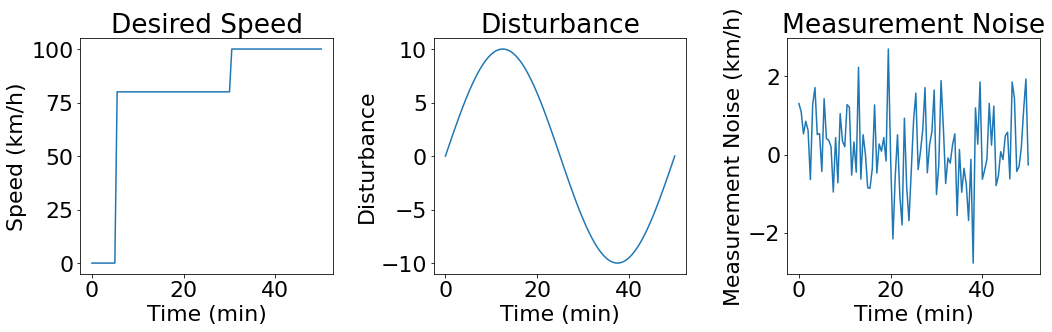

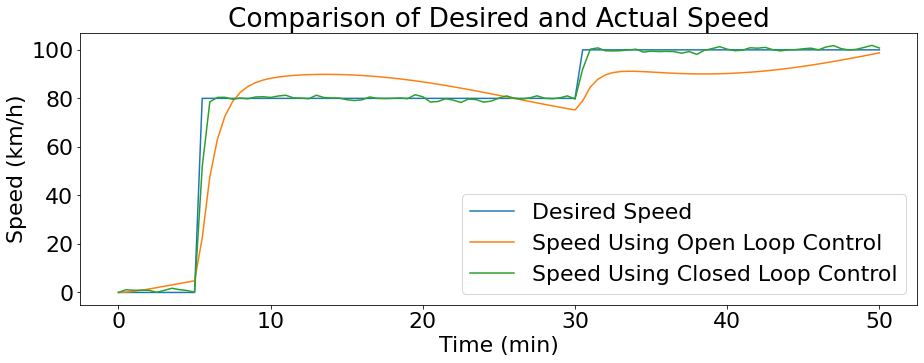

In [3]:
d_hill = 10*np.sin(t/100*np.pi*4)
y_closed_loop, u_closed_loop = cu.sim_closed_loop(P,K,t,r,d_hill,n)
y_open_loop = cu.sim_open_loop(P,t,r,d_hill)

cu.make_open_and_closed_loop_plots(t,r,d_hill,n,y_closed_loop,y_open_loop)

# Effect of uncertainty in the model (open-loop vs closed-loop)

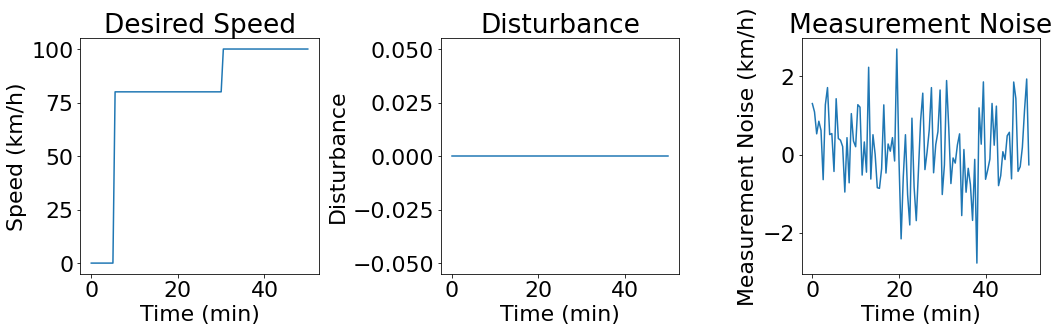

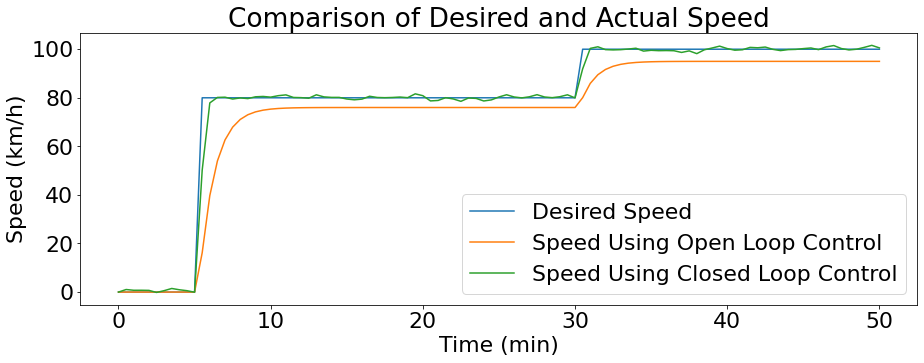

In [4]:
P_changed = 0.95/(s+1)
y_closed_loop, u_closed_loop = cu.sim_closed_loop(P_changed,K,t,r,d,n)
y_open_loop = cu.sim_open_loop(P_changed,t,r,d)
    
cu.make_open_and_closed_loop_plots(t,r,d,n,y_closed_loop,y_open_loop)

# The Feedback Equation!

![feedbackloop](feedbackloop.png "Feedback")

$$
\begin{align}
y(s) &= P(s) \Big( u(s) + d(s) \Big) \\
&= P(s)K(s) \Big( r(s) - y_m(s) \Big ) + P(s)d(s) \\
&= P(s)K(s) r(s) - P(s)K(s) y_m(s) + P(s)d(s) \\
&= P(s)K(s)r(s) - P(s)K(s)\Big(y(s) + n(s)\Big) + P(s)d(s) \\
&= P(s)K(s)r(s) - P(s)K(s)y(s)  - P(s)K(s) n(s)+ P(s)d(s) \\
&= \frac{P(s)K(s)}{1+P(s)K(s)} r(s) - \frac{P(s)K(s)}{1+P(s)K(s)}n(s) + \frac{P(s)}{1+P(s)K(s)}d(s)
\end{align}
$$

Loop transfer function:

$$L(s) = P(s)K(s)$$

Sensitivity Function:

$$S(s) = \frac{1}{1+P(s)K(s)} = \frac{1}{1 + L}$$ 

Complementary Sensitivity Function:

$$T(s) = \frac{P(s)K(s)}{1+P(s)K(s)} = \frac{L}{1+L}$$ 

Interesting property:

$$S(s) + T(s) = 1$$

Feedback equation becomes:

$$y(s) = T(s)r(s) - T(s)n(s) + S(s)P(s)d(s)$$

In terms of tracking error:

$$
\begin{align}
\varepsilon(s) &= r(s) - y(s) \\
&= r(s) -  T(s)r(s) - T(s)n(s) - S(s)P(s)d(s) \\
&= S(s)r(s) + T(s)n(s) - S(s)P(s)d(s)
\end{align}
$$

Observations:
- $S(s)$ determines the error due to not tracking $r$ 
- $S(s)$ determines the error due to process disturbances $d$
- $T(s)$ determines the error due to measurement noise $n$

# We want both $S(s)$ and $T(s)$ to be small!!
# However recall $S(s) + T(s) = 1$. 


# Let's design $K$! (Idea 1)

There are several possibilities to obtain this desired behaviour:

choose $K$ as a (large) constant.

$$\varepsilon(s) = \frac{1}{1+K(s)P(s)}r(s) - \frac{K(s)P(s)}{1+K(s)P(s)}n(s) - \frac{P(s)}{1+K(s)P(s)}d(s)$$

Future topic: PID control

# Your Turn!

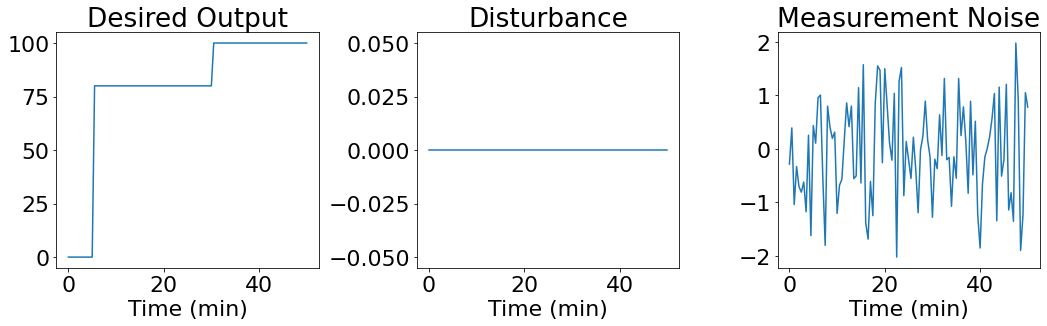

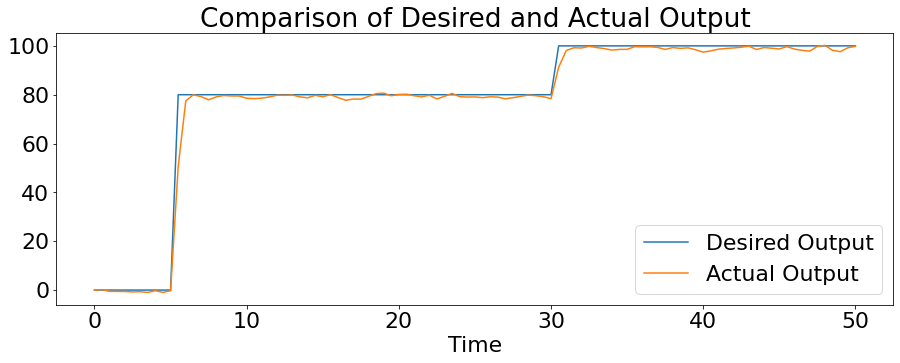

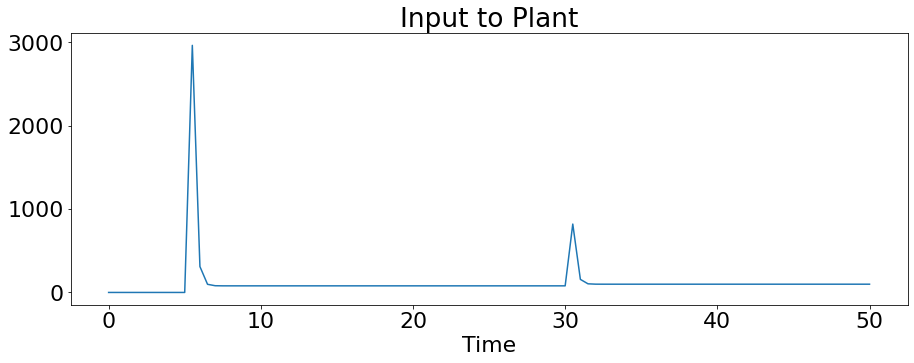

In [7]:
import control as ct
import numpy as np
import controls_teaching_lecture_utilities as cu
s = ct.tf('s')

# Reference, disturbance and measurement noise signals
t = np.linspace(0, 50, 101)
r = [0 if ti <= 5 else
     80 if ti <= 30 else
     100 for ti in t]
r = np.array(r)
d = np.zeros(101)
n = np.random.randn(101)

# Liquid levels example from "Modern Control Engineering ", by Katsuhiko Ogata 

R = 100 #sec/m^2
C = 1/5 #m^2 (cross sectional area of tank)

P_liquid_level = 1/(R*C*s + 1)

# try different controllers
K = 100


y, u = cu.sim_closed_loop(P_liquid_level,K,t,r,d,n)
cu.make_closed_loop_plots(t,r,d,n,y,u)

# Material for next lecture

# Balancing Priorities

$$\varepsilon(s) =S(s)r(s) + T(s)n(s) - S(s)P(s)d(s)$$

![FrequencyDomainRepresentationDesiredSensitivity](sensitivityBode.png "Frequency Domain Representation of Desirable Sensitivity Function")

# That is great insight!
# However, how does this help us? Our ''tuning knob'' is the controller K...

In [ ]:
L = 1/s

S = 1/(1+L)
T = L/(1+L)
mag, phase, omega = bode([S, T], dB=True, plot=False)

fig, ax = plt.subplots(1,1, figsize = [10,5])
ax.semilogx(omega[0],[20*math.log10(x) for x in mag[0]], label='Sensitivity Function')
ax.semilogx(omega[1],[20*math.log10(x) for x in mag[1]], label='Complementary Sensitivity Function')
#ax.semilogx(omega[0],mag[0], label='Sensitivity Function')
#ax.semilogx(omega[1],mag[1], label='Complementary Sensitivity Function')
ax.set_xlabel('Frequency (rad/s)')
ax.set_ylabel('Magnitude (dB)')
ax.set_title('Bode Plot')
plt.legend(bbox_to_anchor=(1.05,1), borderaxespad=0)
plt.show()

# How does $K$ affect frequency response of $S$ and $T$?

$$
\begin{align}
S(s) &= \frac{1}{1+L(s)}  = \frac{1}{1+P(s)K(s)} \\
T(s) &= \frac{L(s)}{1+L(s)} = \frac{P(s)K(s)}{1+P(s)K(s)}  
\end{align}
$$

In [ ]:
L = 1/s

S = 1/(1+L)
T = L/(1+L)
mag, phase, omega = bode([S, T, L], dB=True, plot=False)



fig, ax = plt.subplots(1,1, figsize = [10,5])
ax.semilogx(omega[0],[20*math.log10(x) for x in mag[0]], label='Sensitivity Function')
ax.semilogx(omega[1],[20*math.log10(x) for x in mag[1]], label='Complementary Sensitivity Function')
ax.semilogx(omega[2],[20*math.log10(x) for x in mag[2]], label='Loop Transfer Function')
#ax.semilogx(omega[0],mag[0], label='Sensitivity Function')
#ax.semilogx(omega[1],mag[1], label='Complementary Sensitivity Function')
ax.set_xlabel('Frequency (rad/s)')
ax.set_ylabel('Magnitude (dB)')
ax.set_title('Bode Plot')
plt.legend(bbox_to_anchor=(1.05,1), borderaxespad=0)
#ax.grid(True)
plt.show()

![FrequencyDomainRepresentationDesiredLoop](desiredLoopTF.png "Frequency Domain Representation of Desirable Loop Function")

# Let's design $K$! (Idea 2)

![FrequencyDomainRepresentationDesiredLoop](desiredLoopTF.png "Frequency Domain Representation of Desirable Loop Function")

One possible loop transfer function that has our desired behaviour:

$$L(s) = \frac{1}{s}$$

(recall that this is the TF of an integrator)

But 
$$L(s) = K(s)P(s)$$
so can we solve for K?

Future topic: pole placement

In [1]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
import math


(0.999285366048076-0.037798904774643455j)
(1.4124976-0.040179603j)
(1.4099694-0.093541756j)
Using given axis.


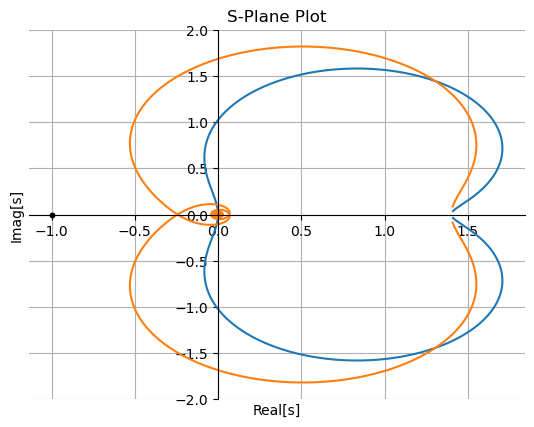

In [15]:
def my_fourier_transform(num,den,omega):
    N = omega.shape[0]
    G_jw = np.zeros(N,dtype=np.csingle)
       
    ii = 0
    for w in omega:
        jomega = 1j*w
        num_jw = 0
        jj = num.shape[0] - 1
        for nn in num:
            num_jw += nn*(jomega**jj)
            jj -= 1
        
        den_jw = 0
        jj = den.shape[0] - 1
        for dd in den:
            den_jw += dd*(jomega**jj)
            jj -= 1
        #print(den_jw)
        #print(num_jw)
        G_jw[ii] = num_jw/den_jw
        ii += 1
    return G_jw




def my_nyquist_plot(G_jw,omega,ax=[],fig=[]):
    if ax:
        print('Using given axis.')
    else:
        fig, ax = plt.subplots(1,1)
    
    ax.plot(np.real(G_jw), np.imag(G_jw))
    cur_color = ax.lines[-1].get_color()
    ax.plot(np.real(G_jw), -np.imag(G_jw),color=cur_color)

    ax.grid(True)
    ax.spines['left'].set_position('zero')
    # turn off the right spine/ticks
    ax.spines['right'].set_color('none')
    ax.yaxis.tick_left()
    # set the y-spine
    ax.spines['bottom'].set_position('zero')

    # turn off the top spine/ticks
    ax.spines['top'].set_color('none')
    ax.xaxis.tick_bottom()
    ax.set_title('S-Plane Plot')
    ax.set_xlabel('Real[s]')
    ax.set_ylabel('Imag[s]')

    ax.xaxis.set_label_coords(0.5,-0.01)
    ax.yaxis.set_label_coords(-0.01,0.5)

    ax.plot(-1,0,'k.')
    return fig, ax

num_sys = np.array([2, 7])
den_sys = np.array([1, 2, 5])

roots_den = np.roots(den_sys)
roots_num = np.roots(num_sys)
den_corner_freqs = np.abs(roots_den)
num_corner_freqs = np.abs(roots_num)

N = 1000
omega_min = np.min( [np.min(den_corner_freqs), np.min(num_corner_freqs)] )
omega_max = np.max( [np.max(den_corner_freqs), np.max(num_corner_freqs)] )
omega = np.logspace(np.log10(omega_min/10),np.log10(omega_max*100),num=N)

G_jw = my_fourier_transform(num_sys,den_sys,omega)

delay = np.exp(-complex(0,math.pi/4/5)*omega)
G_jw_rot = np.zeros(N,dtype=np.csingle)
for ii in range(N):
    G_jw_rot[ii] = G_jw[ii]*delay[ii]

print(delay[10])
print(G_jw[10])
print(G_jw_rot[10])

fig,ax = my_nyquist_plot(G_jw,omega)
fig,ax = my_nyquist_plot(G_jw_rot,omega,ax=ax,fig=fig)

In [12]:
complex(1,1)

(1+1j)

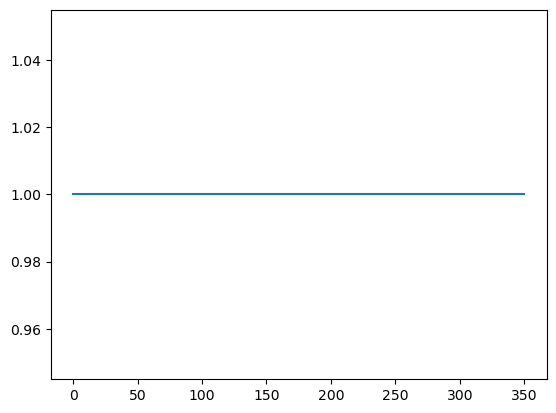

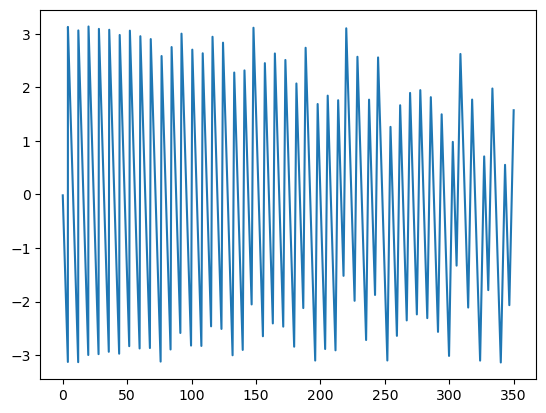

In [22]:

fig,ax = plt.subplots(1,1)
ax.plot(omega,np.abs(delay))
fig,ax = plt.subplots(1,1)
ax.plot(omega,np.angle(delay))
